In [1]:
from load_dataset import *
import matplotlib.pyplot as plt
from scenarios import *

In [2]:
print("="*80)
print("EXEMPLES D'UTILISATION - 4 SCÉNARIOS D'APPRENTISSAGE")
print("="*80)

# Initialiser le loader
loader = MLDatasetLoader('../DATASET/PAZTSX_CRYO_ML.hdf5')

# 1. Afficher les statistiques
print("\n Statistiques du dataset:")
stats = loader.get_statistics_summary()
print(f"  Classes: {loader.classes}")
print(f"  Satellites: {loader.satellites}")
print(f"  Nombre total de groupes: {loader.n_groups}")

EXEMPLES D'UTILISATION - 4 SCÉNARIOS D'APPRENTISSAGE

 Statistiques du dataset:
  Classes: ['ACC', 'PLA', 'ROC', 'HAG', 'STUDY', 'ABL', 'ICA', 'FOR']
  Satellites: ['TerraSAR-X', 'TanDEM-X', 'PAZ']
  Nombre total de groupes: 216


In [ ]:
# ==========================================================================
# SCÉNARIO 1: Classification Temporelle Stacking
# ==========================================================================

scenario1_data = scenario_1_temporal_stacking_classification(
    loader=loader,
    window_size=16,
    max_mask_value=1,
    max_mask_percentage=10.0,
    min_valid_percentage=100.0,  # Changed from 100.0 to 50.0
    orbit='ASC',
    start_date='20200101',
    end_date='20201231',
    scale_type='amplitude',
    skip_optim_offset=True,
)

print("\nScenario 1 terminé:")
print(f"  X.shape: {scenario1_data['X'].shape}")
print(f"  y.shape: {scenario1_data['y'].shape}")
print(f"  groups.shape: {scenario1_data['groups'].shape}")
print(f"  Labels uniques: {np.unique(scenario1_data['y'])}")
print(f"  Classes: {scenario1_data['class_names']}")
print(f"  Groupes uniques: {len(np.unique(scenario1_data['groups']))}")


SCENARIO 1: Temporal Stacking Classification (Dual-Pol)
Parameters:
  - Windows: 16x16
  - Polarization: Dual (HH + HV)
  - Period: 20200101 - 20201231
  - Scale type: amplitude
  - Scale type: amplitude
  - Mask max: 1, 0.0%



Groups: 100%|██████████| 52/52 [00:04<00:00, 11.66grp/s, ROC007 (ROC)]



Results:
  - Total windows: 1659
  - X.shape: (1659, 16, 16, 21, 2)
  - y.shape: (1659,)
  - groups.shape: (1659,)
  - Unique classes: (array([0, 1, 2, 3, 4, 5, 6]), array([687, 139, 140,   1, 581,   8, 103]))
  - Unique groups: 35
  - Timestamps per window: min=21, max=21, mean=21.0

Scenario 1 terminé:
  X.shape: (1659, 16, 16, 21, 2)
  y.shape: (1659,)
  groups.shape: (1659,)
  Labels uniques: [0 1 2 3 4 5 6]
  Classes: {0: 'ACC', 1: 'PLA', 2: 'ROC', 3: 'HAG', 4: 'ABL', 5: 'ICA', 6: 'FOR'}
  Groupes uniques: 35


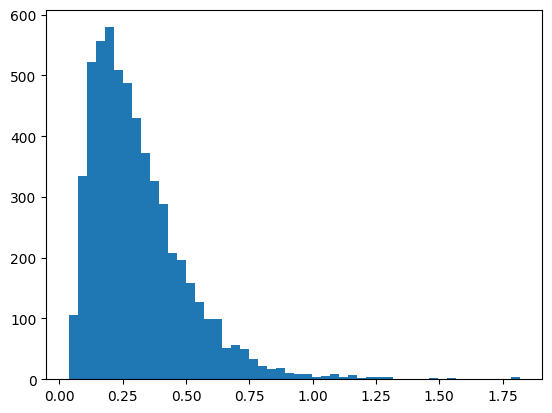

In [14]:
idx = np.where(scenario1_data['y'] == 1)[0]
plt.hist(np.float32(scenario1_data["X"][idx][:,:,0,0]).ravel(), bins=50);

In [3]:
scenario_data = scenario_1_temporal_stacking_classification(
    loader=loader,
    window_size=8,
    max_mask_value=1,
    max_mask_percentage=10.0,
    min_valid_percentage=100.0,  # Changed from 100.0 to 50.0
    orbit='ASC',
    start_date='20200101',
    end_date='20201231',
    scale_type='amplitude',
    skip_optim_offset=False,
)



SCENARIO 1: Temporal Stacking Classification (Dual-Pol)
Parameters:
  - Windows: 8x8
  - Polarization: Dual (HH + HV)
  - Period: 20200101 - 20201231
  - Scale type: amplitude
  - Scale type: amplitude
  - Mask max: 1, 10.0%



Groups:   0%|          | 0/52 [00:00<?, ?grp/s, ABL001 (ABL)]/home/mgallet/Documents/Codes/Python/3_DEVELOPPEMENT/CPAZMAL/script/load_dataset.py:454: RuntimeWarning: invalid value encountered in sqrt
  images_transformed = np.where(images >= 0, np.sqrt(images), np.nan)
Groups: 100%|██████████| 52/52 [00:41<00:00,  1.24grp/s, ROC007 (ROC)]



Results:
  - Total windows: 10288
  - X.shape: (10288, 8, 8, 21, 2)
  - y.shape: (10288,)
  - groups.shape: (10288,)
  - Unique classes: (array([0, 1, 2, 3, 4, 5, 6]), array([4039,  841,  892,   59, 3735,  129,  593]))
  - Unique groups: 44
  - Timestamps per window: min=21, max=21, mean=21.0


In [23]:
# ==========================================================================
# SCÉNARIO 2: Prédiction Temporelle LSTM
# ==========================================================================
scenario2_data = scenario_2_temporal_prediction_lstm(
    loader=loader,
    window_size=32,
    max_mask_value=1,
    max_mask_percentage=10.0,
    orbit='DSC',
    polarization='HH',
    train_start='20200101',
    train_end='20210831',
    predict_start='20210901',
    predict_end='20211231'
)

print(f"\nScénario 2 terminé:")
print(f"  X_train: Liste de {len(scenario2_data['X_train'])} fenêtres")
print(f"  X_predict: Liste de {len(scenario2_data['X_predict'])} fenêtres")
print(f"  Exemple shape X_train[0]: {scenario2_data['X_train'][0].shape}")
print(f"  Exemple shape X_predict[0]: {scenario2_data['X_predict'][0].shape}")
print(f"  Timestamps train[0]: {scenario2_data['timestamps_train'][0]}")
print(f"  Timestamps predict[0]: {scenario2_data['timestamps_predict'][0]}")


SCENARIO 2: Temporal Prediction LSTM
Parameters:
  - Windows: 32x32
  - Polarization: HH
  - Orbit: DSC
  - Train: 20200101 - 20210831
  - Predict: 20210901 - 20211231
  - Scale type: intensity
  - Mask max: 1, 10.0%



Groups: 100%|██████████| 52/52 [00:10<00:00,  4.76grp/s, ROC007 (ROC)]



Results:
  - Total windows: 659
  - X_train.shape: (659, 32, 32, 48)
  - X_predict.shape: (659, 32, 32, 8)
  - groups.shape: (659,)
  - class_labels uniques: (array([0, 1, 2, 3, 4, 5, 6]), array([271,  58,  69,   1, 214,  12,  34]))
  - Unique groups: 35

Scénario 2 terminé:
  X_train: Liste de 659 fenêtres
  X_predict: Liste de 659 fenêtres
  Exemple shape X_train[0]: (32, 32, 48)
  Exemple shape X_predict[0]: (32, 32, 8)
  Timestamps train[0]: ['20200108' '20200130' '20200210' '20200221' '20200303' '20200325'
 '20200405' '20200416' '20200427' '20200508' '20200530' '20200610'
 '20200621' '20200702' '20200713' '20200724' '20200804' '20200815'
 '20200826' '20200906' '20200928' '20201009' '20201020' '20201031'
 '20201111' '20201122' '20201203' '20201214' '20201225' '20210127'
 '20210207' '20210218' '20210301' '20210312' '20210323' '20210403'
 '20210414' '20210425' '20210506' '20210517' '20210528' '20210608'
 '20210619' '20210630' '20210711' '20210722' '20210802' '20210813']
  Timestamps

In [ ]:
# ==========================================================================
# SCÉNARIO 3: Domain Adaptation HH vs HV
# ==========================================================================
scenario3_data = scenario_3_domain_adaptation_pol(
    loader=loader,
    window_size=32,
    max_mask_value=1,
    max_mask_percentage=10.0,
    orbit='DSC',
    target_date='20200804'
)

print(f"\nScénario 3 terminé:")
print(f"  X_source (HH) shape: {scenario3_data['X_source'].shape}")
print(f"  X_target (HV) shape: {scenario3_data['X_target'].shape}")
print(f"  Labels: {scenario3_data['y'].shape}")
print(f"  Satellites: {np.unique(scenario3_data['satellites'])}")

In [ ]:
# ==========================================================================
# SCÉNARIO 4: Domain Adaptation PAZ vs TerraSAR-X
# ==========================================================================
scenario4_data = scenario_4_domain_adaptation_satellite(
    loader=loader,
    window_size=32,
    max_mask_value=1,
    max_mask_percentage=10.0,
    orbit='DSC',
    source_date='20200804',
    target_date='20080805'
)

print(f"\nScénario 4 terminé:")
print(f"  X_source (PAZ) shape: {scenario4_data['X_source'].shape}")
print(f"  X_target (TSX) shape: {scenario4_data['X_target'].shape}")
print(f"  y_source shape: {scenario4_data['y_source'].shape}")
print(f"  Classes: {scenario4_data['class_names']}")